<a href="https://colab.research.google.com/github/Ro-Vad1m/My-works/blob/main/HM6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from pandas.core.groupby.generic import DataFrameGroupBy
from google.colab import files
import pandas as pd
DataFrameGroupBy = pd.read_csv('facebook_ads_data (2.0).csv')

In [17]:
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [18]:
df.dtypes

,0
ad_date,object
campaign_name,object
total_spend,float64
total_impressions,int64
total_clicks,int64
total_value,float64
cpc,float64
cpm,float64
ctr,float64
romi,float64


In [23]:
df['ad_date'] = pd.to_datetime(df['ad_date'])
df.dtypes

,0
ad_date,datetime64[ns]
campaign_name,object
total_spend,float64
total_impressions,int64
total_clicks,int64
total_value,float64
cpc,float64
cpm,float64
ctr,float64
romi,float64


In [33]:
# 1. Зроби групування даних по дням та для згрупованих даних побудуй два графіки:
daily = df_2021.groupby('ad_date').agg({
    'total_spend': 'sum',
    'romi': 'mean'
}).reset_index()

daily['spend_7d'] = daily['total_spend'].rolling(window=7, min_periods=1).mean()
daily['romi_7d'] = daily['romi'].rolling(window=7, min_periods=1).mean()


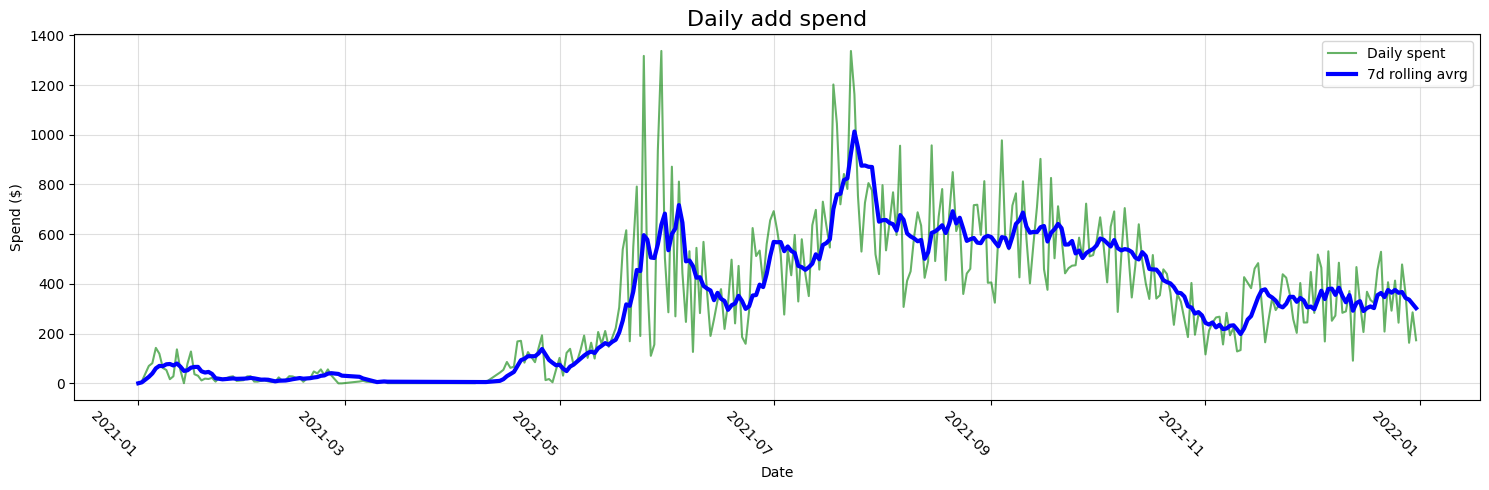

In [57]:
plt.figure(figsize=(15, 5))
plt.plot(daily['ad_date'], daily['total_spend'],
         label='Daily spent', color='green', alpha=0.6)
plt.plot(daily['ad_date'], daily['spend_7d'],
         label='7d rolling avrg', color='blue', linewidth=3)

plt.title('Daily add spend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Spend ($)')
plt.xticks(rotation=-45, ha='right')
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

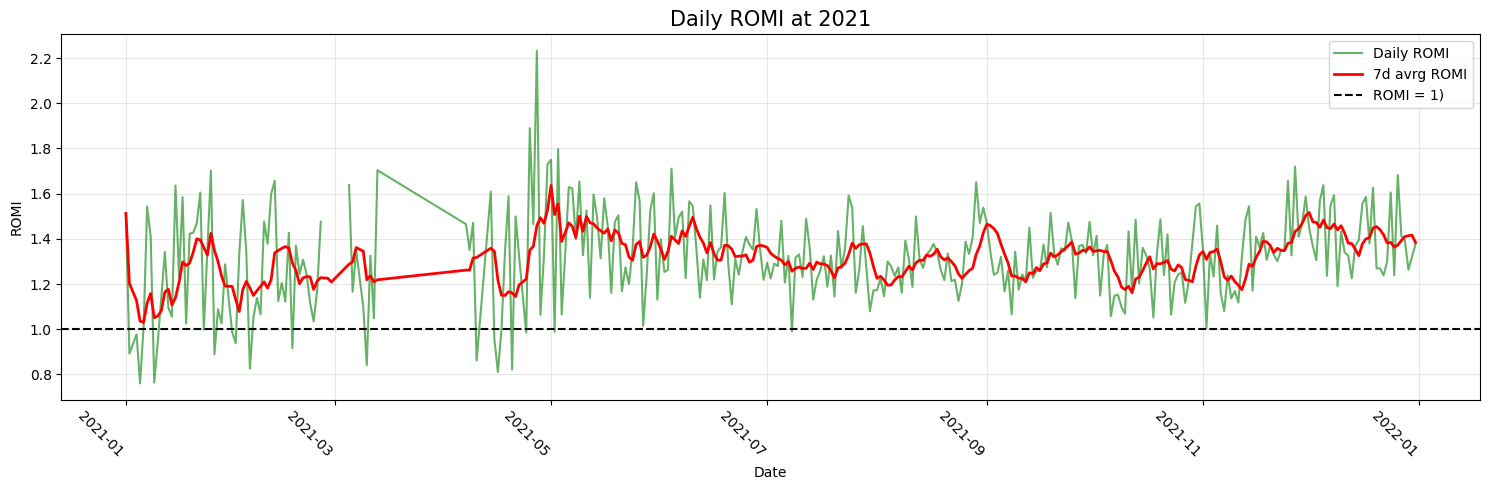

In [68]:
plt.figure(figsize=(15, 5))
plt.plot(daily['ad_date'], daily['romi'],
         label='Daily ROMI', color='green', alpha=0.6)
plt.plot(daily['ad_date'], daily['romi_7d'],
         label='7d avrg ROMI', color='red', linewidth=2)

plt.axhline(y=1, color='black', linestyle='--', label='ROMI = 1)')
plt.title('Daily ROMI at 2021', fontsize=15)
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.xticks(rotation=-45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
# 2. Зроби групування даних за назвою кампанії побудуй два графіки

campaign = df.groupby('campaign_name').agg({
    'total_spend': 'sum',
    'romi': 'mean'
}).round(2)

campaign = campaign.sort_values('total_spend', ascending=False)


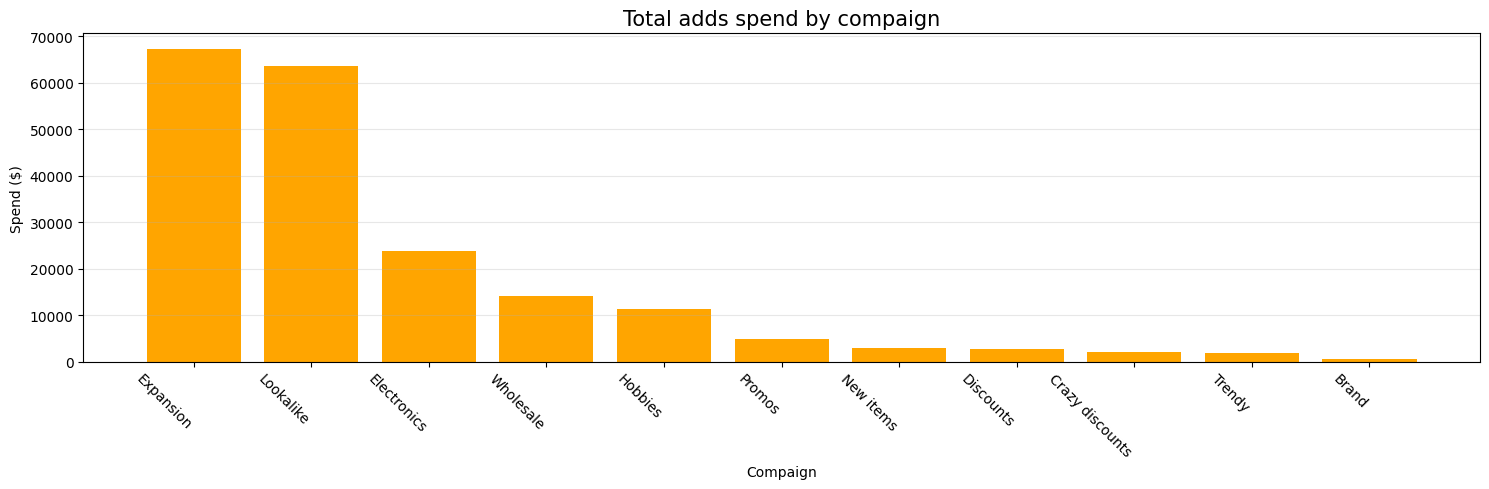

In [75]:
plt.figure(figsize=(15, 5))
plt.bar(campaign.index, campaign['total_spend'], color='orange')

plt.title('Total adds spend by compaign', fontsize=15)
plt.xlabel('Compaign')
plt.ylabel('Spend ($)')
plt.xticks(rotation=-45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

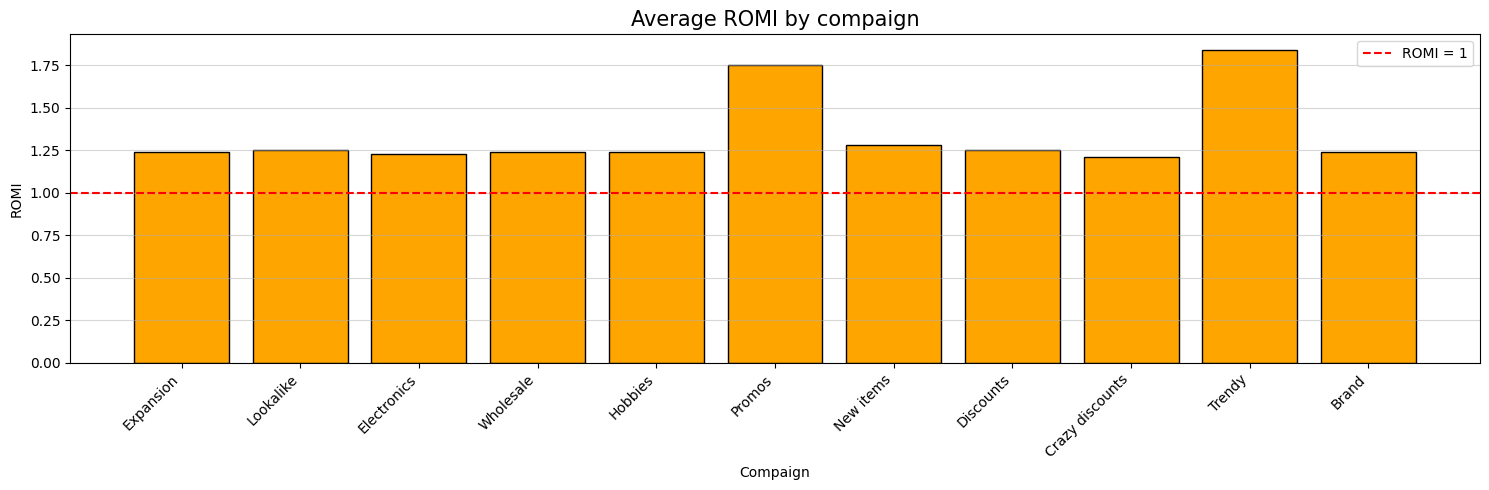

In [88]:
plt.figure(figsize=(15, 5))
plt.bar(campaign.index, campaign['romi'], color='orange', edgecolor='black')

plt.title('Average ROMI by compaign', fontsize=15)
plt.xlabel('Compaign')
plt.ylabel('ROMI')
plt.axhline(y=1, color='red', linestyle='--', label='ROMI = 1')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

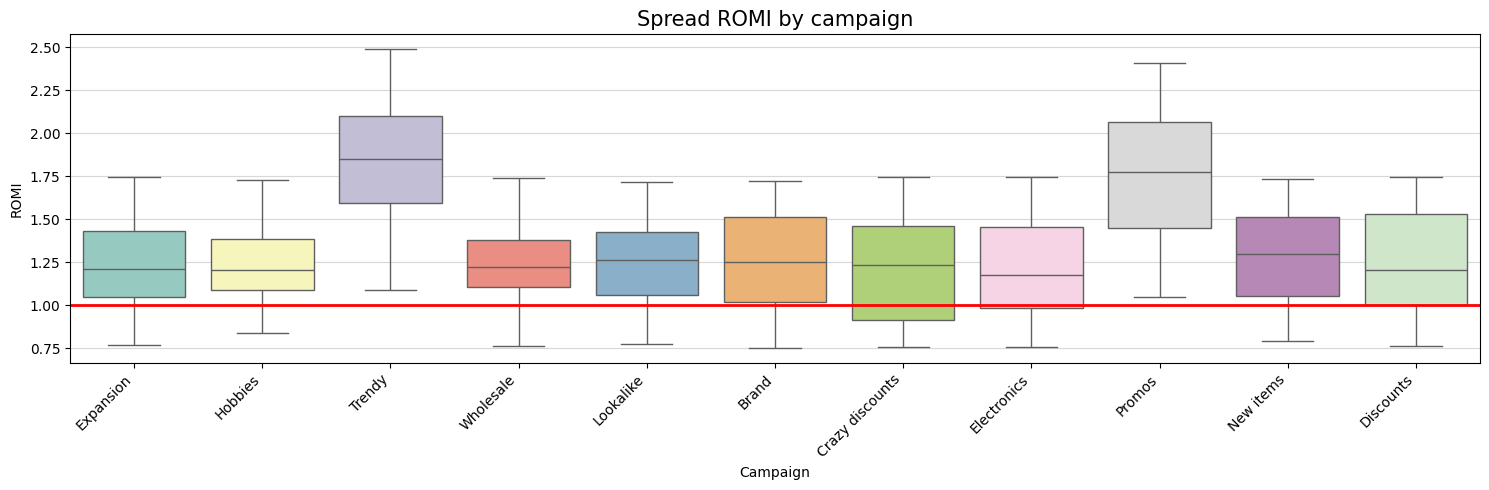

In [89]:
# 3 За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='campaign_name', y='romi',
            hue='campaign_name', palette='Set3', legend=False)

plt.title('Spread ROMI by campaign', fontsize=15)
plt.xlabel('Campaign')
plt.ylabel('ROMI')
plt.axhline(y=1, color='red', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

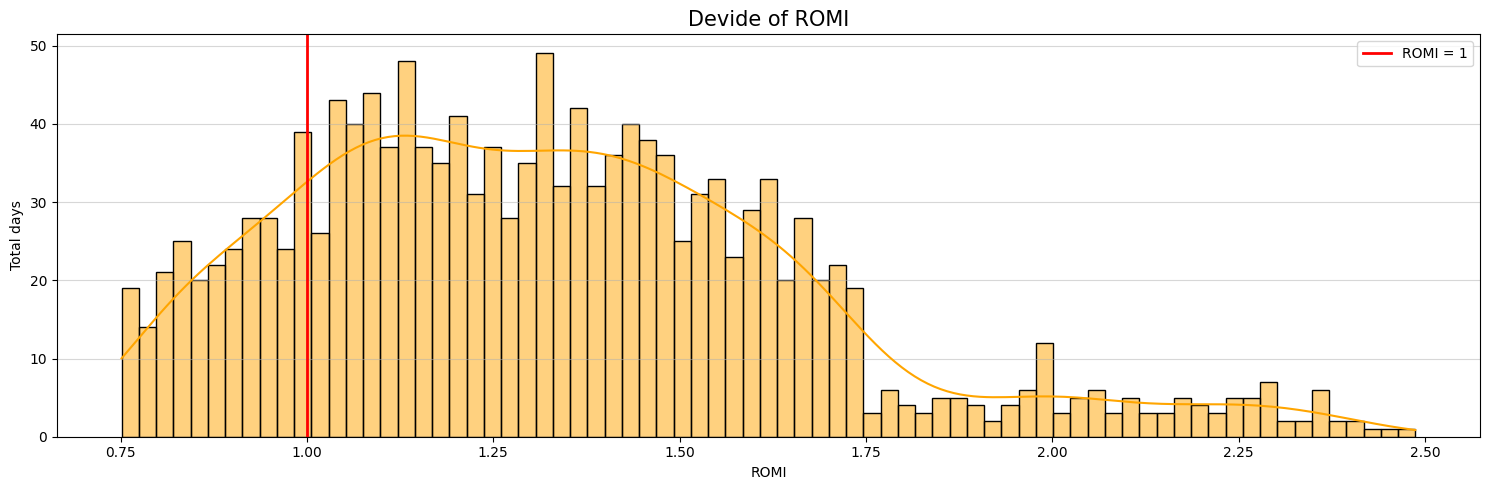

In [93]:
# 4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='romi', bins=75, kde=True, color='orange')

plt.title('Devide of ROMI', fontsize=15)
plt.xlabel('ROMI')
plt.ylabel('Total days')
plt.axvline(x=1, color='red', linewidth=2, label='ROMI = 1')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

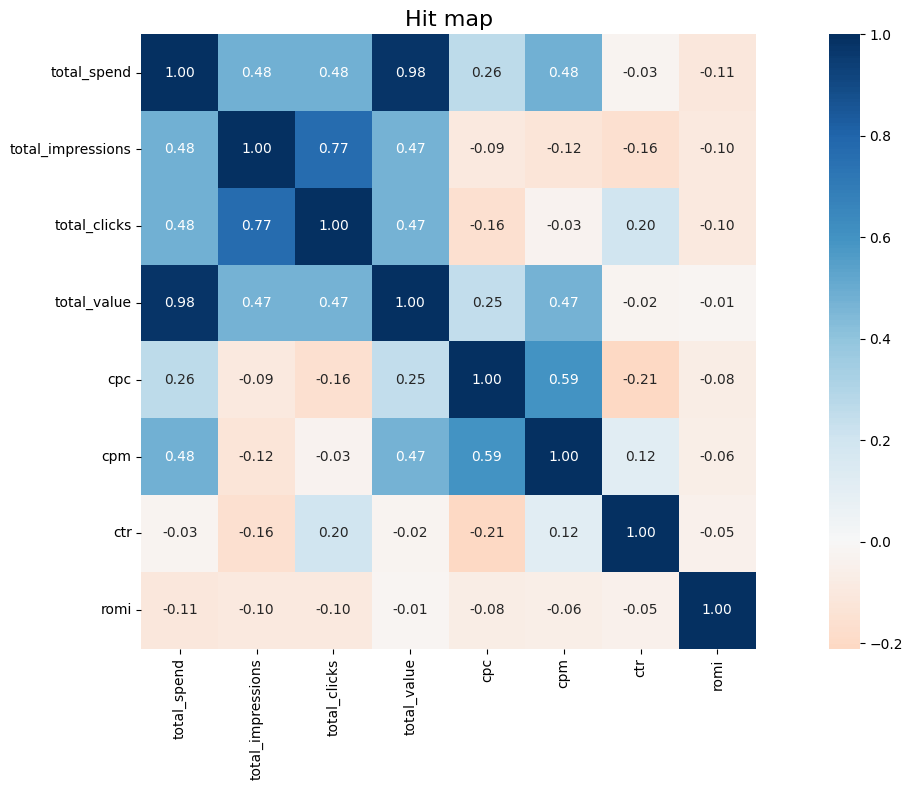

In [103]:
# 5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', center=0, square=True, fmt='.2f')

plt.title('Hit map', fontsize=16)
plt.tight_layout()
plt.show()

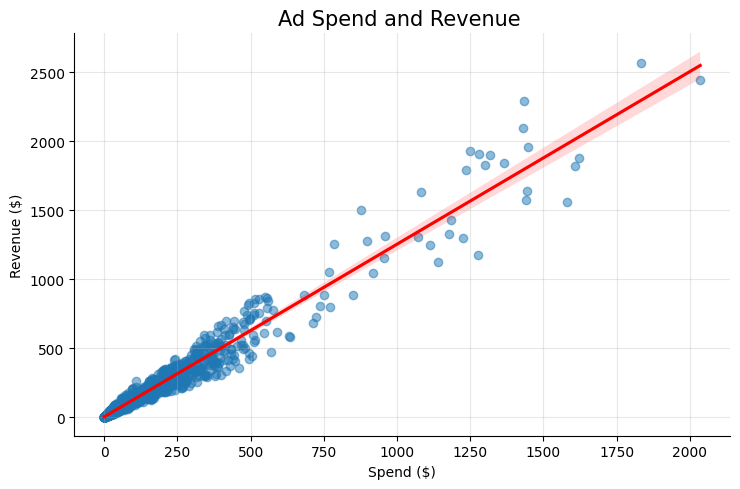

In [111]:
# 6. Побудуй точкову діаграму з лінійною регресією
sns.lmplot(data=df, x='total_spend', y='total_value',
           height=5, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Ad Spend and Revenue ', fontsize=15)
plt.xlabel('Spend ($)')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()